In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/aptos2019-blindness-detection/sample_submission.csv
/kaggle/input/aptos2019-blindness-detection/test.csv
/kaggle/input/aptos2019-blindness-detection/train.csv
/kaggle/input/aptos2019-blindness-detection/test_images/75b6ffa63525.png
/kaggle/input/aptos2019-blindness-detection/test_images/28cba3df4fa9.png
/kaggle/input/aptos2019-blindness-detection/test_images/80976eb17462.png
/kaggle/input/aptos2019-blindness-detection/test_images/93220677378c.png
/kaggle/input/aptos2019-blindness-detection/test_images/7ffecef49237.png
/kaggle/input/aptos2019-blindness-detection/test_images/44477c53f3d9.png
/kaggle/input/aptos2019-blindness-detection/test_images/95e13f31b451.png
/kaggle/input/aptos2019-blindness-detection/test_images/fbcd28a51ef7.png
/kaggle/input/aptos2019-blindness-detection/test_images/9772f0ba0ee7.png
/kaggle/input/aptos2019-blindness-detection/test_images/2e6a99e1df80.png
/kaggle/input/aptos2019-blindness-detection/test_images/f72a18c76408.png
/kaggle/input/aptos2019-

In [2]:
df_train=pd.read_csv('/kaggle/input/aptos2019-blindness-detection/train.csv')
df_test=pd.read_csv('/kaggle/input/aptos2019-blindness-detection/test.csv')                   

In [3]:
df_test.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


In [4]:
df_train.shape
import cv2

In [5]:
def preprocess(imag_path):
    imag=cv2.imread(imag_path)
    imag=cv2.resize(imag,(150,150))
    return imag

In [6]:

x_train=np.empty((3662,150,150,3))

image_id=df_train['id_code']
from tqdm import tqdm

In [7]:
for i,image_id in enumerate(tqdm(df_train['id_code'])):
    x_train[i,:,:,:]=preprocess(f'../input/aptos2019-blindness-detection/train_images/{image_id}.png')

100%|██████████| 3662/3662 [05:21<00:00, 11.47it/s]


In [8]:
df_test.shape
image_id=df_test['id_code']

In [9]:
x_test=np.empty((1928,150,150,3))
for i,image_id in enumerate(tqdm(df_test['id_code'])):
    x_test[i,:,:,:]=preprocess(f'../input/aptos2019-blindness-detection/test_images/{image_id}.png')

100%|██████████| 1928/1928 [01:00<00:00, 31.99it/s]


In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [11]:
   x= df_train.loc[:,'id_code']
y_test=df_test

In [12]:
y_test

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4
5,009c019a7309
6,010d915e229a
7,0111b949947e
8,01499815e469
9,0167076e7089


In [13]:
image=cv2.imread(f'../input/aptos2019-blindness-detection/train_images/{x[0]}.png')

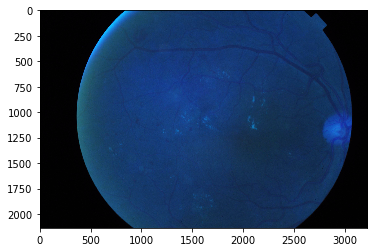

In [14]:
plt.imshow(image)

In [15]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

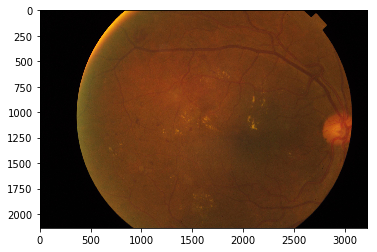

In [16]:
plt.imshow(image)

In [17]:
image=cv2.resize(image,(150,150))

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

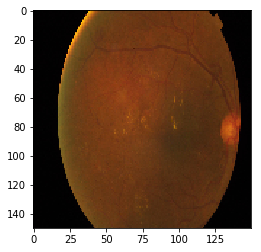

In [18]:
import keras
plt.imshow(image)
y_train=df_train['diagnosis']
y_train = keras.utils.to_categorical(y_train, 5)


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, 
    test_size=0.15, 
    
)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Conv2D,MaxPool2D,Dropout,Flatten,Activation
from keras.preprocessing.image import ImageDataGenerator


In [21]:
model=Sequential()


In [22]:
model.add(Conv2D(64,(3,3),padding='valid',input_shape=(150,150,3),activation='relu'))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.add(Conv2D(64,(3,3),padding='valid',activation='relu'))

In [25]:
model.add(MaxPool2D(2,2))

In [26]:
model.add(Conv2D(128,(3,3),padding='valid',activation='relu'))

In [27]:
model.add(Conv2D(128,(3,3),padding='valid',activation='relu'))

In [28]:
model.add(MaxPool2D(2,2))

In [29]:
model.add(Conv2D(256,(3,3),padding='valid',activation='relu'))
model.add(Conv2D(256,(3,3),padding='valid',activation='relu'))

model.add(MaxPool2D(2,2))

In [30]:
model.add(Flatten())

In [31]:
model.add(Dense(128,activation='relu'))

In [32]:
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))

In [33]:
model.add(Dense(5,activation='softmax'))

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 69, 69, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 256)       295168    
__________

In [35]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [36]:


def create_datagen():
    return ImageDataGenerator(
        zoom_range=0.15,  
        fill_mode='constant',
        cval=0.,  
        horizontal_flip=True,  
        vertical_flip=True,  
    )


data_generator = create_datagen().flow(x_train, y_train, batch_size=32)

In [37]:
model.fit_generator(data_generator,epochs=5,steps_per_epoch=x_train.shape[0]/32,validation_data=(x_val, y_val))

Epoch 1/5
98/97 [==============================] - 676s 7s/step - loss: 11.6121 - acc: 0.2736 - val_loss: 11.5171 - val_acc: 0.2855
Epoch 2/5
98/97 [==============================] - 669s 7s/step - loss: 11.7238 - acc: 0.2726 - val_loss: 11.5171 - val_acc: 0.2855
Epoch 3/5
98/97 [==============================] - 670s 7s/step - loss: 9.8814 - acc: 0.3868 - val_loss: 8.4400 - val_acc: 0.4764
Epoch 4/5
98/97 [==============================] - 669s 7s/step - loss: 8.5678 - acc: 0.4684 - val_loss: 8.4400 - val_acc: 0.4764
Epoch 5/5
98/97 [==============================] - 671s 7s/step - loss: 8.4497 - acc: 0.4758 - val_loss: 8.4400 - val_acc: 0.4764


In [38]:
x_test.shape

(1928, 150, 150, 3)

In [39]:
x_test[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [40]:
y_final=model.predict(x_test)

In [41]:
y_final[0]

array([1., 0., 0., 0., 0.], dtype=float32)

In [42]:
np.argmax(y_final[1817])

0

f

In [43]:
y_final

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)